In [1]:
import numpy as np
import pandas as pd
import folium
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import HTML, display
import ipywidgets

In [2]:
df=pd.read_csv(r"C:\Users\Mario\Documents\Labs\Module3\Project8_Uber Data Visualisation\uber-raw-data-aug14.csv")


In [3]:
df.dtypes


Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [4]:
df.isna().sum()
# u_sept.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [5]:
# df['Date'] = pd.to_datetime(df['Date/Time']).dt.month
# df['Time'] = pd.to_datetime(df['Date/Time']).dt.day
# df['Time'] = pd.to_datetime(df['Date/Time']).dt.hour

In [5]:
df1=df.sample(frac=0.01, random_state=1)

In [6]:
df1

Date/Time      Lat      Lon    Base
64470    8/5/2014 11:48:00  40.7036 -73.9907  B02598
304953   8/5/2014 14:34:00  40.7493 -73.9758  B02617
806937  8/23/2014 20:58:00  40.6953 -74.1775  B02764
745410   8/25/2014 1:44:00  40.7549 -73.9846  B02682
274496   8/2/2014 19:45:00  40.7650 -73.9208  B02617
...                    ...      ...      ...     ...
303292   8/5/2014 11:22:00  40.7429 -73.9742  B02617
25029   8/24/2014 14:03:00  40.7358 -73.9948  B02512
37975    8/1/2014 19:06:00  40.7412 -73.9998  B02598
240911   8/30/2014 4:32:00  40.7954 -73.9636  B02598
520590  8/23/2014 16:43:00  40.6372 -73.9600  B02617

[8293 rows x 4 columns]

In [7]:
# df1=df[['Date','Time','Lat','Lon','Base']]

In [8]:
df1=df1.drop(['Date/Time'], axis=1)

In [9]:
df1['Day'] = pd.to_datetime(df1['Date/Time']).dt.day
df1['Hour'] = pd.to_datetime(df1['Date/Time']).dt.hour
df1['Weekday'] = pd.to_datetime(df1['Date/Time']).dt.day_name()

# uber['Day_Of_Week'] = pd.DatetimeIndex(uber['Date/Time']).day_name()


In [9]:
# df1['Hour']=df1.Time.dt.hour
#df_group['weekday']=df_group.datetime.dt.day_name()

In [10]:
df1

Lat      Lon    Base
64470   40.7036 -73.9907  B02598
304953  40.7493 -73.9758  B02617
806937  40.6953 -74.1775  B02764
745410  40.7549 -73.9846  B02682
274496  40.7650 -73.9208  B02617
...         ...      ...     ...
303292  40.7429 -73.9742  B02617
25029   40.7358 -73.9948  B02512
37975   40.7412 -73.9998  B02598
240911  40.7954 -73.9636  B02598
520590  40.6372 -73.9600  B02617

[8293 rows x 3 columns]

In [11]:
# df_sampl=df1.sample(frac=0.01, random_state=1)
# df_sampl

In [12]:
dat_model=df1[['Lon','Lat']]
dat_model

Lon      Lat
64470  -73.9907  40.7036
304953 -73.9758  40.7493
806937 -74.1775  40.6953
745410 -73.9846  40.7549
274496 -73.9208  40.7650
...         ...      ...
303292 -73.9742  40.7429
25029  -73.9948  40.7358
37975  -73.9998  40.7412
240911 -73.9636  40.7954
520590 -73.9600  40.6372

[8293 rows x 2 columns]

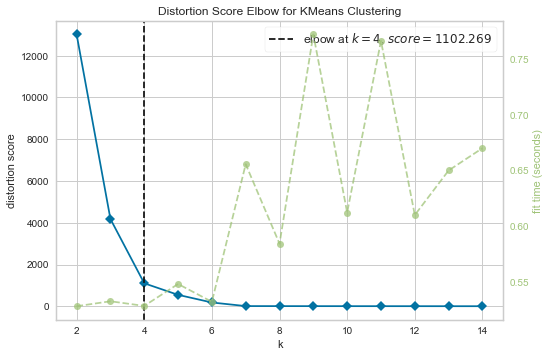

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
kmeans=KMeans()
visualizer = KElbowVisualizer(estimator = kmeans, k = (2,15))
visualizer.fit(dat_model)
visualizer.poof()

# df1.plot.scatter(x='Lat',y='Lon',c='Date')

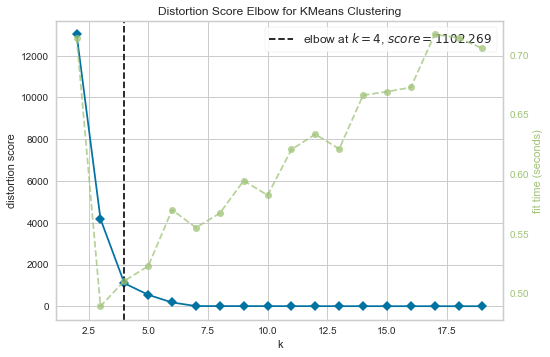

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
kmeans=KMeans()
visualizer = KElbowVisualizer(estimator = kmeans, k = (2,20))
visualizer.fit(dat_model)
visualizer.poof()

In [15]:
kmeans=KMeans(n_clusters=7)
kmeans.fit(dat_model)
kmeans.predict(dat_model)
kmeans.labels_
dat_model['KM_label']=kmeans.labels_

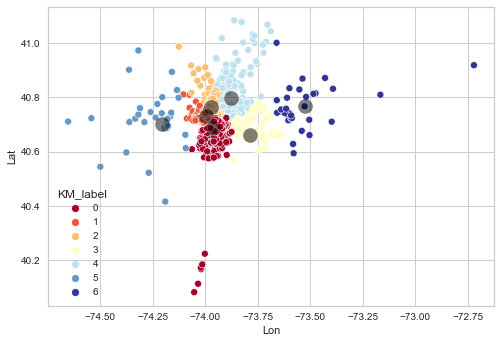

In [16]:
sns.scatterplot(data=dat_model, x='Lon', y='Lat',hue=dat_model['KM_label'], palette='RdYlBu')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [17]:
centers

array([[-73.9619495 ,  40.68597152],
       [-73.99768205,  40.73117154],
       [-73.97173676,  40.76642314],
       [-73.78632062,  40.66093746],
       [-73.87918207,  40.79858207],
       [-74.20381429,  40.70185816],
       [-73.52284194,  40.76984516]])

In [18]:
DB=DBSCAN(eps=0.5, min_samples=7)
DB.fit(dat_model)
dat_model['DB_label']=DB.labels_
dat_model

Lon      Lat  KM_label  DB_label
64470  -73.9907  40.7036         1         0
304953 -73.9758  40.7493         2         1
806937 -74.1775  40.6953         5         2
745410 -73.9846  40.7549         2         1
274496 -73.9208  40.7650         2         1
...         ...      ...       ...       ...
303292 -73.9742  40.7429         2         1
25029  -73.9948  40.7358         1         0
37975  -73.9998  40.7412         1         0
240911 -73.9636  40.7954         2         1
520590 -73.9600  40.6372         0         5

[8293 rows x 4 columns]

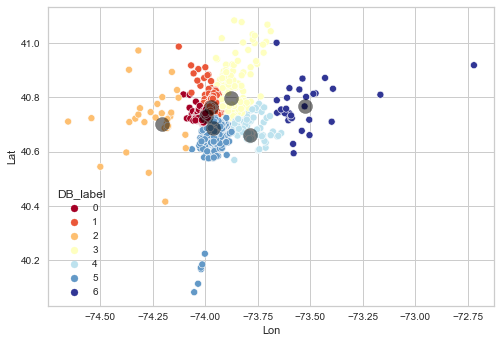

In [19]:
centers = kmeans.cluster_centers_
sns.scatterplot(data=dat_model, x='Lon', y='Lat',hue=dat_model['DB_label'], palette='RdYlBu')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [20]:
af = AffinityPropagation(max_iter=20, random_state=0).fit(dat_model)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
labels

C:\Users\Mario\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:236: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


array([   0,    1, 3101, ..., 6948, 6949, 3897], dtype=int64)

In [31]:
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interactive
from IPython.display import display


m = folium.Map(location=[40.7128, -74.0060], zoom_start=7)
map_df=dat_model.copy()
#map_df=map_df.sample(frac=0.1replace=True, random_state=1)
map_df=map_df.reset_index()
c={0:'green',1:'red',2:'orange',3:'blue',4:'crimson',5:'gray',6:'black',7:'pink'}
for i in range(0,map_df.shape[0],1):
    folium.Circle(location=[map_df.at[i,'Lat'],map_df.at[i,'Lon']],radius=1,color=c[map_df.at[i,'KM_label']]).add_to(m)

In [30]:
m

map

In [ ]:
df1.head(3)

In [ ]:
hourly_ride_data = df1.groupby(['Weekday','Hour'])['Base'].count()

hourly_ride_data=pd.DataFrame(hourly_ride_data)
hourly_ride_data.rename(columns = {'Base':'Pick_ups_per_Hour'}, inplace = True)
#df.reset_index()
hourly_ride_data

In [ ]:
sns.set(rc = {'figure.figsize':(20,8)})
sns.lineplot(data=hourly_ride_data, x='Hour',y='Pick_ups_per_Hour', hue='Weekday')

In [26]:
hourly_ride_data['Base']

KeyError: 'Base'

In [ ]:
out = ipywidgets.Output(layout={'border': '1px solid black'})

w = ipywidgets.Dropdown(
    options=df1.columns.values.tolist(),
    value=df1.columns.values[0],
    description='Column:',
    disabled=False,
)

def on_dropdown_change(change):
    out.clear_output()
    with out:
        display(df1.explore(w.value, cmap="Blues"))

w.observe(on_dropdown_change, names='value')
display(w)

with out:
    display(df1.explore(df1.columns[0], cmap="Blues"))

out

In [ ]:
sept=pd.read_csv(r"C:\Users\Mario\Documents\Labs\Module3\Project8_Uber Data Visualisation\uber-raw-data-sep14.csv")

<AxesSubplot:ylabel='Base'>

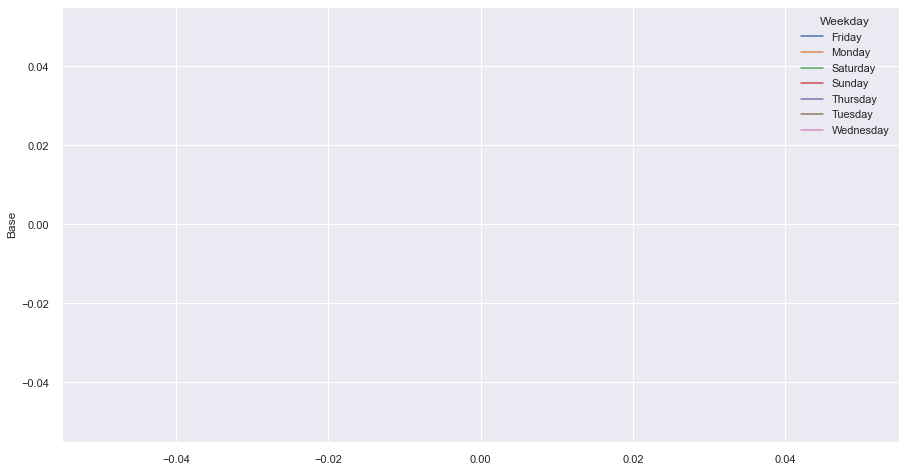

In [124]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=hourly_ride_data, y=hourly_ride_data['Friday'],data=hourly_ride_data, hue='Weekday', ci=None)

In [135]:
hourly_ride_data.index.get_level_values(0)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='Hour', length=168)